# Book/Data Club: Deep Learning with PyTorch
<img src="./images/cover.png" alt="Book Cover" width="200" align="right"/>

### by Shashwat Sridhar

#### Feb 03, 2021

# About the book

- released August 2020 (available online for free)
- Eli Stevens and Luca Antiga part of original pytorch developers
- serves as a guide to:
    - the pytorch library
    - basics of neural networks
    - implementing complex/deep networks
    - scaling deep networks to production

<div>
    <img src="./images/thomasviehmann.jpeg", alt="Thomas Viehmann", width="100", align="right" />
    <img src="./images/lucaantiga.jpeg", alt="Luca Antiga", width="100", align="right" />
    <img src="./images/elistevens.jpeg", alt="Eli Stevens", width="100", align="right" />
</div>

## Organization

Book organized in to three parts

1. Core PyTorch and basic neural networks
2. Real world example with cancer data
3. Deployment of models to production

# Topics for today

- Introduction
- Motivating example
- Basics of PyTorch
- Real-world data representation with tensors
- Mechanics of learning
- Basic neural network

<div>
    <img src="./images/pietorch.jpeg", alt="Pie torch?", width="200", align="right" />
</div>

# What is pytorch?

Open source machine learning framework written in Python

> PyTorch is a Python package that provides two high-level features:
>
> - Tensor computation (like NumPy) with strong GPU acceleration
> - Deep neural networks built on a tape-based autograd system


- What is machine learning?
- What are tensors (and how do they compare to numpy arrays)?
- What are deep neural networks?
- What is autograd?

Hopefully covered today!

<div>
    <img src="./images/machineLearning.png", alt="Machine learning?", width="200", align="right" />
</div>

# What is machine learning?

Study of computer algorithms that improve automatically through learning.

- feature-engineering as a traditional approach, eg. MNIST

<div>
    <img src="./images/mnist_eg.png", alt="mnist", width="400", align="right" />
</div>

#### Deep learning finds such features, or representations, automatically

<div>
    <img src="./images/ml_vs_features.png", alt="mnist", width="600", align="center" />
</div>

## Example: image classification with AlexNet

<div>
    <img src="./images/alexnet.png", alt="AlexNet", width="800", align="center" />
</div>

<br>
Multiple layers of computation on each input image.

## Popular models available in PyTorch

In [13]:
from torchvision import models

dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

### Example with AlexNet

In [1]:
from torchvision.models import alexnet
from torchvision import transforms
import torch
from PIL import Image

In [2]:
alexnet = alexnet(pretrained=True)

In [10]:
alexnet.eval();

In [4]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

### Import image

In [5]:
with open('./imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

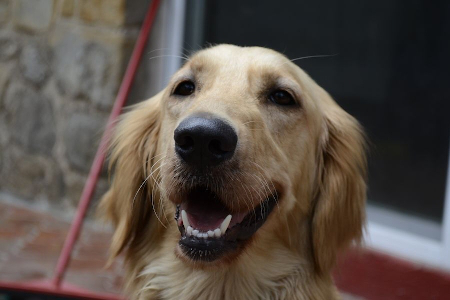

In [17]:
doggo = Image.open("./images/doggo.jpg")
doggo

In [18]:
doggo_t = preprocess(doggo)
doggo_batch_t = torch.unsqueeze(doggo_t, 0)

### Run AlexNet on doggo

In [19]:
who_is_a_good_doggo = alexnet(doggo_batch_t)

In [20]:
_, index = torch.max(who_is_a_good_doggo, 1)
percentage = torch.nn.functional.softmax(who_is_a_good_doggo, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 97.13250732421875)

# PyTorch Tensors

- analogous to numpy arrays
    - contiguous storage
    - provide views of the actual storage
    - highly optimized for linear algebra operations
    - support advanced indexing
    - support for various dtypes
    

- additional features
    - native gpu support
    - in-built autograd features    
    - seamless numpy compatibility

### Tensors: Storage

Elements of tensor in contiguous storage, accessed by views on storage

![](./images/tensors_storage.png)

### Tensors: Metadata

- `tensor.storage_offset()` : where in the storage the tensor view starts from
- `tensor.stride()` : in which order to access the N-dimensional data
- `tensor.shape` : shape of the stored data

<div>
    <img src="./images/tensors_striding.png", alt="Tensor transpose", width="800", align="center" />
</div>

### Tensors: Metadata

<div>
    <img src="./images/tensors_transpose.png", alt="Tensor transpose", width="500", align="center" />
</div>

#### However, `tensor.transpose()` makes tensor non-contiguous

### Tensors: frequently used commands

### `tensor.view()`

In [30]:
a = torch.randint(0, 10, (8, 4))

In [33]:
a.shape, a.stride()

(torch.Size([8, 4]), (4, 1))

In [38]:
b = a.view(-1, 2, 4);

In [39]:
b.shape, b.stride()

(torch.Size([4, 2, 4]), (8, 4, 1))

### `tensor.unsqueeze_()`

In [23]:
a = torch.randint(0, 10, (2, 5))

In [26]:
a, a.shape, a.stride()

(tensor([[0, 7, 1, 2, 2],
         [8, 1, 2, 6, 2]]),
 torch.Size([2, 5]),
 (5, 1))

In [29]:
a.unsqueeze_(-1);

In [28]:
a, a.shape, a.stride()

(tensor([[[0],
          [7],
          [1],
          [2],
          [2]],
 
         [[8],
          [1],
          [2],
          [6],
          [2]]]),
 torch.Size([2, 5, 1]),
 (5, 1, 1))

# Real-world data representation with tensors

## 2D Images

Colored images contain 3 channels, each encoding for Red, Green and Blue

<div>
    <img src="./images/2dimages.png", width="600" />
</div>

Three dimensions to work with:

- Channels `C` (R, B and G)
- Height `H`
- Width `W`

Models in pytorch like image data input to be arranged as

#### C x H x W

<div>
    <img src="./images/hemsworth.jpeg", width=300/>
</div>

### Additional dimension necessary: batches

<div>
    <img src="./images/batchinputs.png" width="600" align="center" />
</div>

- PyTorch models work on batches of input data
    - more efficient GPU usage
    - occassionally used by models to infer statistics within dataset
    
All input data must contain an extra dimension `N` for number of batches

Thus, for 2D images:

#### N x C x H x W

#### Example

In [50]:
import numpy as np

doggo = Image.open("./images/doggo.jpg")

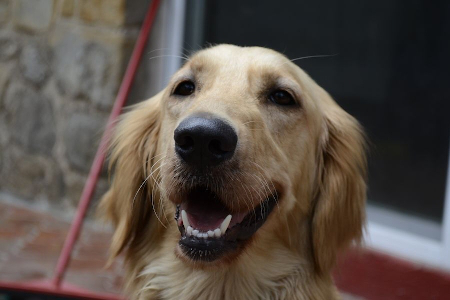

In [64]:
doggo

#### Example

In [55]:
doggo_t = torch.from_numpy(np.array(doggo))

In [65]:
doggo_t.shape

torch.Size([300, 450, 3])

In [59]:
final_doggo = doggo_t.permute(2, 0, 1).unsqueeze(0)

In [60]:
final_doggo.shape

torch.Size([1, 3, 300, 450])

## 3D images

3D images (for example CT scans) contain an extra dimension of depth

<div>
    <img src="./images/3dimages.png" width="600" />
</div>

The extra depth dimension `D` is accommodated as follows:

#### N x C x D x H x W

<div>
    <img src="./images/duckling.jpeg", width="400" />
</div>

Cute Duckling Has Wings

# Building models and learning

## Basic idea of a model
Ca. 1609

<div>
    <img src="./images/kepler.png" width="800" align="center" />
</div>

### Learning = parameter estimation

Any model takes parameters as input in addition to data

- the parameters of a typical neural network are called _weights_
- learning involves fine-tuning the weights of the model to minimize loss (relative to ground truth)
    - typically achieved through _gradient descent_

<div>
    <img src="./images/optiomizer.png" width="200" />
    <img src="./images/amongus.png" width="400" />
</div>

- Fine tuning weights = calculating the _gradient_ of the loss wrt to the weights
    - "how does the loss vary with small changes in the weights?"
    - "for what values of the weights do I have minimal loss?"

The idea behind the name _gradient descent_ is to move in the parameter space downward along the gradient in order to reach the desired minimum.

Given a model:

In [ ]:
def model(data, w, b):
    return w * data + b

and a loss function:

In [ ]:
def loss(predicted, real):
    return ((real - predicted) ** 2).mean()

<div>
    <img src="./images/gradient.png" width="800" align="center" />
</div>

## Process of learning

<div>
    <img src="./images/learning.png" width="800" align="center" />
</div>

## Autograd: automatic computation of gradients

The computation of gradients for all inputs to a model is automated in PyTorch using Autograd. It:

1. internally builds a computational graph of parameters (tensors) involved in a forward pass
2. propogates the error back to all parameters on the backward pass

<div>
    <img src="./images/autograd.png" width="500" align="center" />
</div>

### Example Code

Recall:

<div>
    <img src="./images/gradient.png" width="800" align="center" />
</div>

In [ ]:
# messy grad function
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>

In [ ]:
# do not try this at home
for epoch in range(1, n_epochs + 1):
    w, b = params

    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w, b)

    params = params - learning_rate * grad

In [ ]:
# autograd, so better
# but still do not try this at home
for epoch in range(1, n_epochs + 1):

    t_p = model(t_u, *params) 
    loss = loss_fn(t_p, t_c)
    loss.backward()
    
    params -= learning_rate * params.grad

For a large number of parameters, the autograd reduces workload tremendously

#### Two new terms:

- epoch
- learning_rate

## Optimizers

- Gradient descent is simple, yet effective at minimizing most loss functions
    - however, not efficient

PyTorch offers many Optimizers to choose from.

In [66]:
from torch import optim

In [69]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_multi_tensor',
 'functional',
 'lr_scheduler',
 'swa_utils']

### Example

In [ ]:
# autograd only
# do not try this at home
for epoch in range(1, n_epochs + 1):

    t_p = model(t_u, *params) 
    loss = loss_fn(t_p, t_c)
    loss.backward()
    
    params -= learning_rate * params.grad

In [ ]:
# autograd + optim
# safe to try at home
for epoch in range(1, n_epochs + 1):
    
    t_p = model(t_u, *params) 
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Here, `optimizer` can take any valid `torch.optim.Optimizer` module.

# Where are the neurons in our neural network?

<div>
    <img src="./images/learning.png" width="800" align="center" />
</div>

# Neuron?

An artificial neuron (or just neuron, for now) is the basic building block of a neural network

A neuron is composed of:

    - Linear component
    - Non-linear activation function

and can be represented as: $ o = f(w \cdot x + b)$

where $f()$ is a non-linear function, $w$ and $b$ are the parameters (weight and bias)

<div>
    <img src="./images/neuron_1.png" width="800" align="center" />
</div>

### Chaining together neurons

A neural network is formed by chaining these non-linear functions together, for eg.

$ o = f(w_n (... f(w_2 (f(w_1 \cdot x + b_1) + b_2) ...) + b_n) $

<div>
    <img src="./images/neuralnetwork.png" width="800" align="center" />
</div>

In [71]:
import torch.nn as nn

In [74]:
seq_model = nn.Sequential(
            nn.Linear(1, 5),
            nn.Tanh(),
            nn.Linear(5, 6),
            nn.Tanh(),
            nn.Linear(6, 3),
            nn.Tanh(),
            nn.Linear(3, 1),
)
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=5, bias=True)
  (1): Tanh()
  (2): Linear(in_features=5, out_features=6, bias=True)
  (3): Tanh()
  (4): Linear(in_features=6, out_features=3, bias=True)
  (5): Tanh()
  (6): Linear(in_features=3, out_features=1, bias=True)
)

## Activation functions

<div>
    <img src="./images/activationfns.png" width="800" align="center" />
</div>

## Choosing an activation function

<div>
    <img src="./images/choosingactivation.png" width="800" align="center" />
</div>

# Step n: combine all ingredients and bake for 30 mins on a GPU

In [ ]:
# Do try this at home

loss_fn = nn.MSELoss

seq_model = nn.Sequential(
    nn.Linear(1, 10),
    nn.Tanh(),
    nn.Linear(10, 1),
)

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

for epoch in range(1, n_epochs + 1):
    t_p_train = seq_model(t_u_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    t_p_val = seq_model(t_u_val)
    loss_val = loss_fn(t_p_val, t_c_val)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

## Several topics not addressed

- normalizing inputs
- training and validation
- under-fitting and over-fitting
- output encoding
- etc.

## In further chapters

- loading and accesing large datasets
- convolutional NNs


- real world example with cancer data